# Imports

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp  # numerical integration solver

# Visualization Functions

In [120]:
def plot_streamplot(A, ax, figtitle=None):
    """
    Show a stream plot for a linear ordinary differential equation with
    state vector in axis ax.

    Args:
      A (numpy array): 2x2 matrix specifying the dynamical system
      figtitle (string): title for the figure

    Returns:
      nothing, but shows a figure
    """

    # sample 20 x 20 grid uniformly to get x1 and x2
    grid = np.arange(-20, 21, 1)
    X, Y = np.meshgrid(grid, grid)

    # calculate Xdot and Ydot at each grid point
    xdot = A[0,0] * X + A[0,1] * Y
    ydot = A[1,0] * X + A[1,1] * Y

    # make a colormap
    magnitude = np.sqrt(xdot ** 2 + ydot ** 2)
    color = 2 * np.log1p(magnitude) #Avoid taking log of zero

    # plot
    plt.sca(ax)
    plt.streamplot(X, Y, xdot, ydot, color=color,
                   linewidth=1, cmap=plt.cm.cividis,
                   density=2, arrowstyle='->', arrowsize=1.5)
    plt.xlabel(r'$X$')
    plt.ylabel(r'$Y$')
    
    plt.yticks(np.arange(-20,20,5))

    # figure title
    if figtitle is not None:
        plt.title(figtitle, size=12)


def plot_specific_example_stream_plots(alphas, A_options):
    """
    Show a stream plot for each A in A_options

    Args:
      A (list): a list of numpy arrays (each element is A)

    Returns:
      nothing, but shows a figure
    """
    
    fig = plt.figure(figsize=(20,30))


    for i, A in enumerate(A_options):

        ax = plt.subplot(5, 2, 1+i)
        # get eigenvalues and eigenvectors
        lam, v = np.linalg.eig(A)

        # plot eigenvalues as title
        eigstr = ",  ".join([f"{x:.2f}" for x in lam])
        
        figtitle =f"Alpha:\n" + alphas[i].astype(str) + "\nEigs: "+ '[' + eigstr + ']'
        plot_streamplot(A, ax, figtitle=figtitle)

        plt.subplots_adjust(wspace=1.0, hspace=1.0)

# Task 1

10


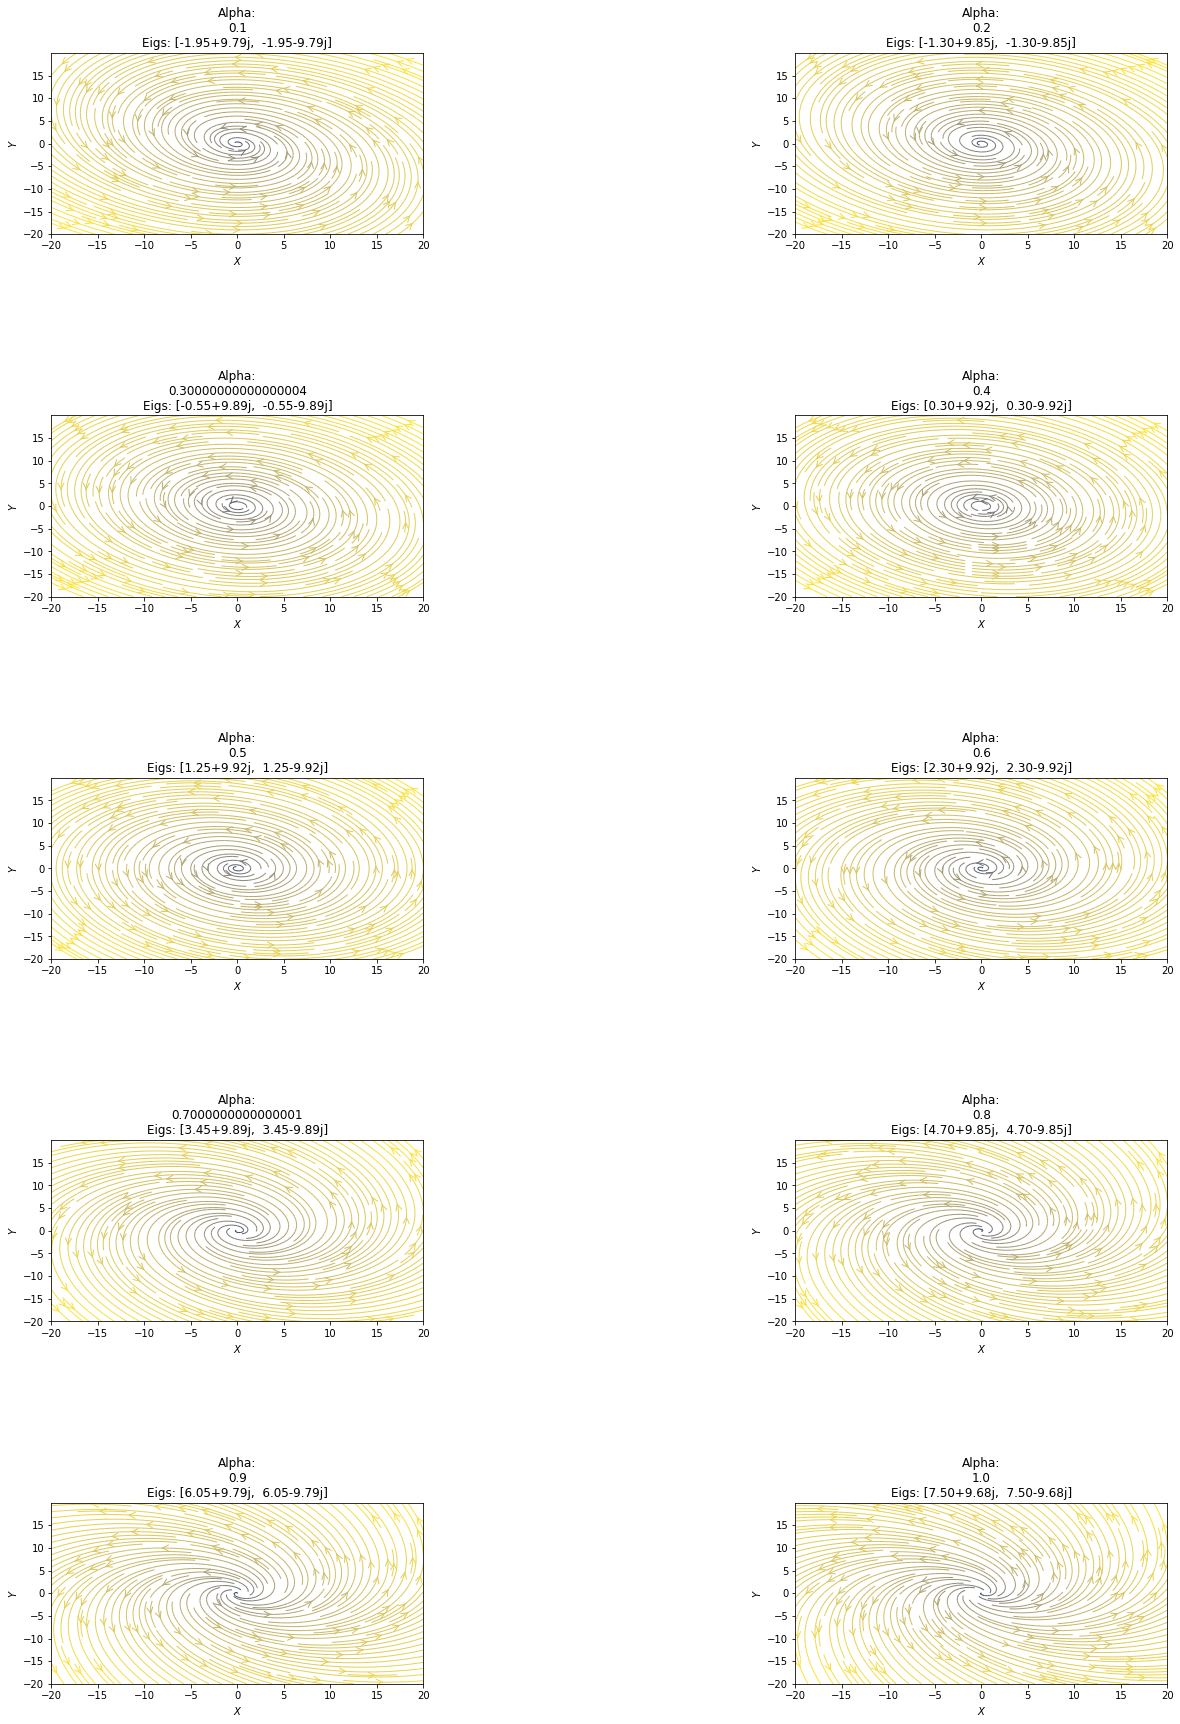

In [121]:
matrices = []
alphas = np.arange(0.1, 1.1, 0.1)
print(len(alphas))

# TODO: We need to determine this f*n matrix somehow.

for alpha in alphas:
    matrices.append(np.array([[(alpha - 0.5) * 10, -1 * 10],[10, alpha**2 * 10]]))
    
plot_specific_example_stream_plots(alphas, matrices)
